# Hill Climbing

---

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import numpy as np
from collections import deque
from AdaptiveNoiseHillClimbingAgent import AdaptiveNoiseHillClimbingAgent
from VanillaHillClimbingAgent import VanillaHillClimbingAgent
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Define the Policy

In [2]:
env = gym.make('CartPole-v0')
print('observation space:', env.observation_space)
print('action space:', env.action_space)

observation space: Box(4,)
action space: Discrete(2)


### 3. Train the Agent with Stochastic Policy Search

In [3]:
env = gym.make('CartPole-v0')
env.seed(1)
np.random.seed()

In [4]:
def plotScores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

def hill_climbing(agent, numberOfEpisodes=2000, max_t=1000, print_every=100):
    """
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): how often to print average score (over last 100 episodes)
    """
    scoresDeque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, numberOfEpisodes+1):
        state = env.reset()
        rewards = []
        for t in range(max_t):
            action = agent.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break 

        agent.update(rewards)

        scoresDeque.append(sum(rewards))
        scores.append(sum(rewards))
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scoresDeque)))
        if np.mean(scoresDeque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scoresDeque)))
            break
        
    return scores

### 4. Vanilla Hill Climbing Scores

Episode 100	Average Score: 22.52
Episode 200	Average Score: 72.08
Episode 300	Average Score: 125.37
Episode 400	Average Score: 44.11
Episode 500	Average Score: 11.27
Episode 600	Average Score: 13.23
Episode 700	Average Score: 9.25
Episode 800	Average Score: 13.35
Episode 900	Average Score: 9.32
Episode 1000	Average Score: 9.40
Episode 1100	Average Score: 9.40
Episode 1200	Average Score: 9.42
Episode 1300	Average Score: 9.32
Episode 1400	Average Score: 9.42
Episode 1500	Average Score: 9.42
Episode 1600	Average Score: 9.44
Episode 1700	Average Score: 9.31
Episode 1800	Average Score: 9.33
Episode 1900	Average Score: 9.44
Episode 2000	Average Score: 9.22


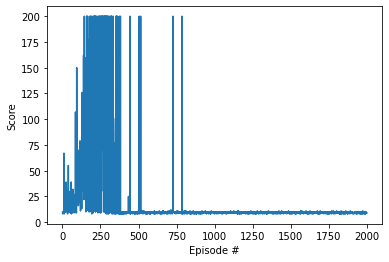

In [5]:
agent = VanillaHillClimbingAgent(4, 2)
scores = hill_climbing(agent)
plotScores(scores)

### 5. Adaptive Noise Scores

Episode 100	Average Score: 26.60
Episode 200	Average Score: 150.82
Environment solved in 134 episodes!	Average Score: 195.10


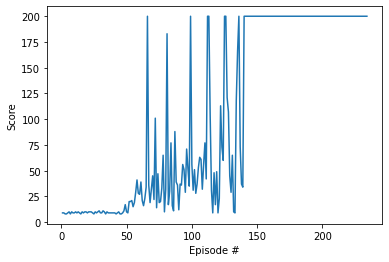

In [6]:
agent = AdaptiveNoiseHillClimbingAgent(4, 2)
scores = hill_climbing(agent)
plotScores(scores)


### 5. Watch a Smart Agent!

In [7]:
env = gym.make('CartPole-v0')
env.seed()
np.random.seed()
state = env.reset()
for t in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()